<a href="https://colab.research.google.com/github/ZenaNBamboat/schulich_data_science/blob/main/intro_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install statsmodels

In [2]:
pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [5]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
bikes['datetime'] = pd.to_datetime(bikes['datetime'])

In [9]:
bikes['weekday'] = bikes['datetime'].dt.weekday

In [10]:
day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
bikes['weekday'] = bikes['weekday'].map(day_map)
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Sat
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Sat
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Sat
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Sat
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Sat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Wed
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Wed
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wed
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wed


In [11]:
bikes['hour'] = bikes['datetime'].dt.hour

In [12]:
def get_time_of_day(hour):
  if hour in range(0,6):
    return 'Overnight'
  elif hour in range(6,9):
    return 'MorningCommute'
  elif hour in range(9,15):
    return 'Midday'
  elif hour in range(15,19):
    return 'EveningCommute'
  else:
    return 'Evening'

In [13]:
bikes['time_of_day'] = bikes['hour'].apply(get_time_of_day)

In [14]:
import seaborn as sns

<Axes: xlabel='time_of_day', ylabel='count'>

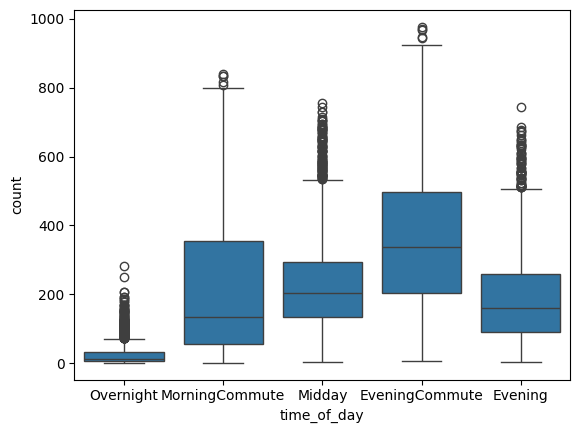

In [15]:
sns.boxplot(x='time_of_day', y='count', data=bikes)

<Axes: xlabel='time_of_day', ylabel='casual'>

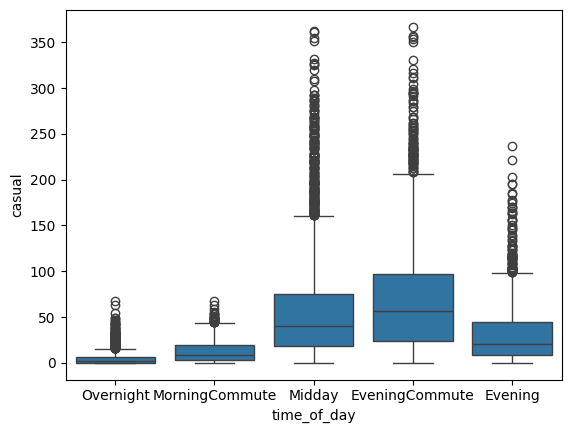

In [16]:
sns.boxplot(x='time_of_day', y='casual', data=bikes)

<Axes: xlabel='weekday', ylabel='casual'>

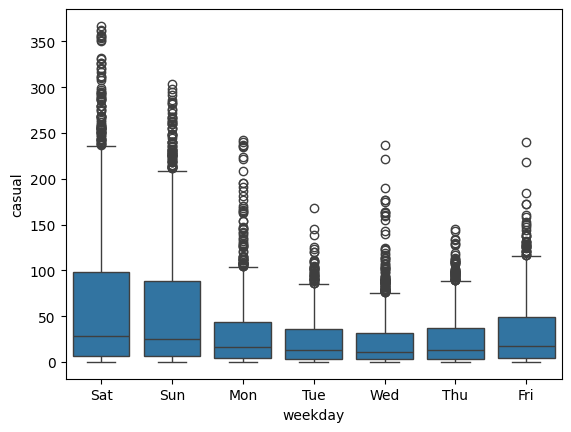

In [17]:
sns.boxplot(x='weekday', y='casual', data=bikes)

<Axes: xlabel='weekday', ylabel='count'>

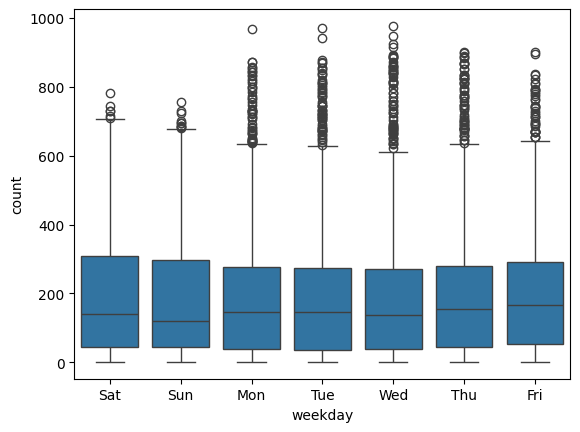

In [18]:
sns.boxplot(x='weekday', y='count', data=bikes)

In [19]:
# one hot encode
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,hour,time_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Sat,0,Overnight
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Sat,1,Overnight
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Sat,2,Overnight
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Sat,3,Overnight
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Sat,4,Overnight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Wed,19,Evening
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Wed,20,Evening
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wed,21,Evening
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wed,22,Evening


In [20]:
pd.get_dummies(bikes['time_of_day'], dtype=int)

,Evening,EveningCommute,Midday,MorningCommute,Overnight
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
10881,1,0,0,0,0
10882,1,0,0,0,0
10883,1,0,0,0,0
10884,1,0,0,0,0


In [21]:
model_data = pd.get_dummies(bikes,columns=['season','weather','weekday','time_of_day','hour'], drop_first=True, dtype=int)

In [22]:
model_data.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'season_2', 'season_3',
       'season_4', 'weather_2', 'weather_3', 'weather_4', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'time_of_day_EveningCommute', 'time_of_day_Midday',
       'time_of_day_MorningCommute', 'time_of_day_Overnight', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [23]:
import statsmodels.api as sm

In [24]:
Y = model_data['count']
X = model_data.drop(columns=['datetime','count','casual','registered'])
X = sm.add_constant(X)

In [25]:
model = OLS(Y,X).fit()

In [26]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     468.2
Date:                Sat, 21 Jun 2025   Prob (F-statistic):               0.00
Time:                        01:33:50   Log-Likelihood:                -66585.
No. Observations:               10886   AIC:                         1.333e+05
Df Residuals:                   10845   BIC:                         1.336e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [27]:
pred = model.predict(X)

In [28]:
final = pd.concat([bikes['count'], pred], axis=1)

In [29]:
final['diff'] = final[0]-final['count']

In [30]:
final['diff'] = abs(final['diff'])

In [31]:
final['diff'].mean()

np.float64(79.13407968211844)

In [32]:
final['count'].mean()

np.float64(191.57413191254824)

In [33]:
#not reliable model 41% error
79/191

0.41361256544502617